<a href="https://colab.research.google.com/github/himanshu-rawat77/Cprogram/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

# Downloading data

In [ ]:
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

In [ ]:
df = pd.read_csv("FuelConsumption.csv")
df.head()

# Data Exploration


In [ ]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(7)

In [ ]:
viz = cdf[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
viz.hist()
plt.show()

# Splitting the data in training and testing sets

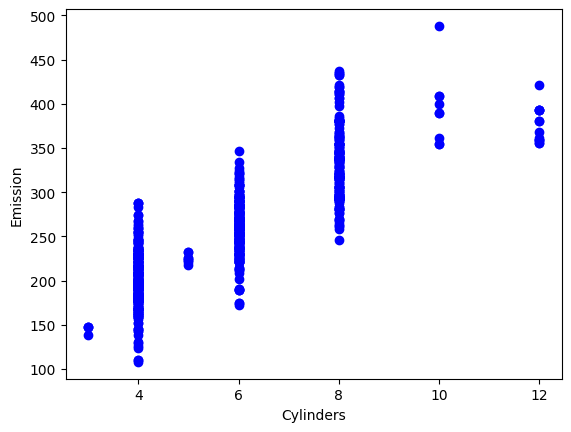

Coefficients:  [[30.04618405]]
Intercept:  [82.92450011]


Text(0, 0.5, 'Emission')

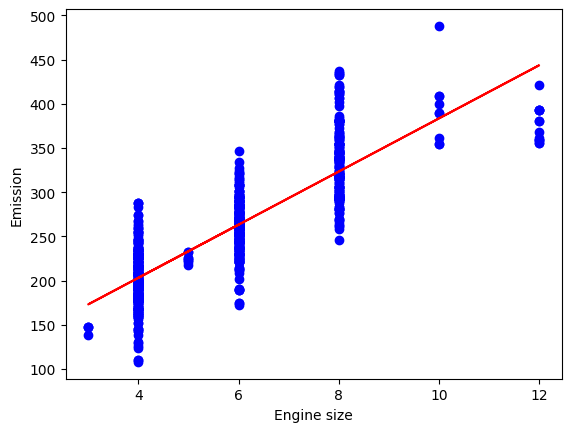

In [25]:
msk = np.random.rand(len(df))<0.8
train = cdf[msk]
test = cdf[~msk]
plt.scatter(train.CYLINDERS, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()


from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['CYLINDERS']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)


plt.scatter(train.CYLINDERS, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

# Evaluation

In [ ]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

# Exercise
### Lets see what the evaluation metrics are if we trained a regression model using the FUELCONSUMPTION_COMB feature.

### Start by selecting FUELCONSUMPTION_COMB as the train_x data from the train dataframe, then select FUELCONSUMPTION_COMB as the test_x data from the test dataframe

In [23]:
train_x = train[["FUELCONSUMPTION_COMB"]]

test_x = test[["FUELCONSUMPTION_COMB"]]


regr = linear_model.LinearRegression()

regr.fit(train_x, train_y)


predictions = regr.predict(test_x)
print("Mean Absolute Error:  %.2f"  % np.mean(np.absolute(predictions - test_y)))

ValueError: operands could not be broadcast together with shapes (193,1) (217,1) 